# import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from os import path

# import data

In [2]:
data_path = '/Users/shreetamakarmakar/code/omdena_mum_aqi/omdena-mumbai-chapter-air-quality/src/data/csv_aqi'

In [3]:
data_list =  [pd.read_csv(f'{data_path}/{fl}', index_col=[0]) for fl in sorted(os.listdir(data_path))]
fname_list = [fl[:-4] for fl in sorted(os.listdir(data_path))]
data_dict = dict(zip(fname_list, data_list))

/var/folders/sl/ygshjd2x6x74vgfq6g4z9mk80000gn/T/ipykernel_13381/1924551278.py:1: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  data_list =  [pd.read_csv(f'{data_path}/{fl}', index_col=[0]) for fl in sorted(os.listdir(data_path))]


In [4]:
data_list =  [pd.read_csv(f'{data_path}/{fl}', index_col=[0]) for fl in sorted(os.listdir(data_path))]
fname_list = [fl[:-4] for fl in sorted(os.listdir(data_path))]
data_dict = dict(zip(fname_list, data_list))

/var/folders/sl/ygshjd2x6x74vgfq6g4z9mk80000gn/T/ipykernel_13381/1924551278.py:1: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  data_list =  [pd.read_csv(f'{data_path}/{fl}', index_col=[0]) for fl in sorted(os.listdir(data_path))]


In [5]:
data_dict.keys()

dict_keys(['BandraKurlaComplexMumbaiIITM', 'BandraMumbaiMPCB', 'BorivaliEastMumbaiIITM', 'BorivaliEastMumbaiMPCB', 'ChakalaAndheriEastMumbaiIITM', 'ChhatrapatiShivajiIntlAirportT2MumbaiMPCB', 'ColabaMumbaiMPCB', 'DeonarMumbaiIITM', 'KandivaliEastMumbaiMPCB', 'KhindipadaBhandupWestMumbaiIITM', 'KurlaMumbaiMPCB', 'MaladWestMumbaiIITM', 'MazgaonMumbaiIITM', 'MulundWestMumbaiMPCB', 'NavyNagarColabaMumbaiIITM', 'PowaiMumbaiMPCB', 'SiddharthNagarWorliMumbaiIITM', 'SionMumbaiMPCB', 'VasaiWestMumbaiMPCB', 'VileParleWestMumbaiMPCB', 'WorliMumbaiMPCB', 'hourly_mean_all_aqi'])

# cleaning datasets etc.

In [6]:
# cleaning dataframe columns 
def clean_columns(df):
#     df = df.drop('Unnamed: 0', axis = 1)
    rename_cols = [c.lower().replace('.', '_').replace(' ', '_').replace('-', '_') for c in df.columns]
    col_dict = dict(zip(df.columns.tolist(), rename_cols))
    df = df.rename(columns = col_dict)
    return df

def missing_val(df):
    return df.isnull().sum().to_frame().reset_index().rename(columns = {'index': 'col_names', 0: 'sum_missing'})

In [7]:
colaba = data_dict['ColabaMumbaiMPCB']

# aggregating dataframes hourly

In [8]:
colaba.columns

Index(['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',
       'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'TOT-RF', 'PM10_24hr_avg', 'PM2.5_24hr_avg',
       'SO2_24hr_avg', 'NOx_24hr_avg', 'NH3_24hr_avg', 'CO_8hr_max',
       'Ozone_8hr_max', 'PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex',
       'NOx_SubIndex', 'NH3_SubIndex', 'Checks', 'AQI_calculated',
       'AQI_bucket_calculated'],
      dtype='object')

In [9]:
def masked_mean(x):
    return x.mask(x.isnull()).mean().round(2)

In [10]:
colaba = colaba.drop('AQI_bucket_calculated', axis = 1)
# Convert the date/time column to a pandas datetime object
colaba['Date'] = pd.to_datetime(colaba['Date'])

# Set the datetime column as the index
colaba.set_index('Date', inplace=True)

# Resample the data by hour, taking the mean of each column
hourly_colaba = colaba.resample('H').apply(masked_mean)



In [11]:
colaba = clean_columns(colaba)

In [12]:
hourly_colaba = clean_columns(hourly_colaba)

<AxesSubplot:ylabel='Date'>

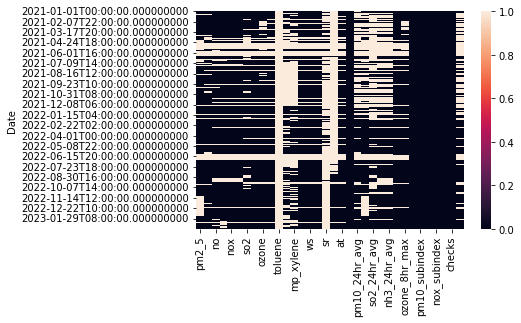

In [13]:
sns.heatmap(hourly_colaba.isnull())

# imputing individual station missing data with overall mean data

In [14]:
hmean = data_dict['hourly_mean_all_aqi']

In [15]:
all_columns = set(hmean.columns)
missing_columns = all_columns - set(hourly_colaba.columns)
for col in list(missing_columns):
    hourly_colaba[col] = np.nan

In [16]:
hmean['date'] = pd.to_datetime(hmean['date'])
hmean.set_index('date', inplace = True)

In [17]:
# hmean.info()

In [18]:
# hourly_colaba.info()

In [19]:
hmean.columns

Index(['pm2_5', 'pm10', 'no', 'no2', 'nox', 'nh3', 'so2', 'co', 'ozone',
       'benzene', 'toluene', 'eth_benzene', 'mp_xylene', 'rh', 'ws', 'wd',
       'sr', 'bp', 'xylene', 'at', 'rf', 'tot_rf', 'pm10_24hr_avg',
       'pm2_5_24hr_avg', 'so2_24hr_avg', 'nox_24hr_avg', 'nh3_24hr_avg',
       'co_8hr_max', 'ozone_8hr_max', 'pm2_5_subindex', 'pm10_subindex',
       'so2_subindex', 'nox_subindex', 'nh3_subindex', 'checks',
       'aqi_calculated', 'temp'],
      dtype='object')

In [20]:
hourly_colaba_copy = hourly_colaba.copy()

hourly_colaba_copy = hourly_colaba_copy.reindex(columns=hmean.columns)

In [21]:
hourly_colaba_copy.fillna(hmean, inplace = True)

<AxesSubplot:ylabel='Date'>

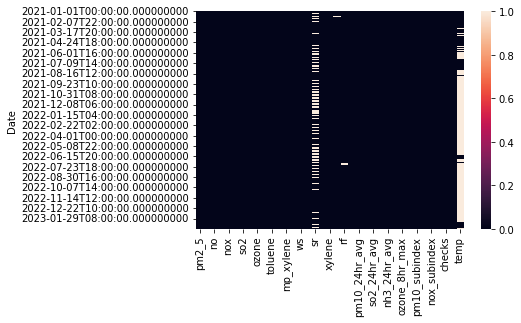

In [22]:
sns.heatmap(hourly_colaba_copy.isnull())

In [23]:
hourly_colaba_copy.columns

Index(['pm2_5', 'pm10', 'no', 'no2', 'nox', 'nh3', 'so2', 'co', 'ozone',
       'benzene', 'toluene', 'eth_benzene', 'mp_xylene', 'rh', 'ws', 'wd',
       'sr', 'bp', 'xylene', 'at', 'rf', 'tot_rf', 'pm10_24hr_avg',
       'pm2_5_24hr_avg', 'so2_24hr_avg', 'nox_24hr_avg', 'nh3_24hr_avg',
       'co_8hr_max', 'ozone_8hr_max', 'pm2_5_subindex', 'pm10_subindex',
       'so2_subindex', 'nox_subindex', 'nh3_subindex', 'checks',
       'aqi_calculated', 'temp'],
      dtype='object')

# check if imputation is done properly

(449232.0, 450696.0)

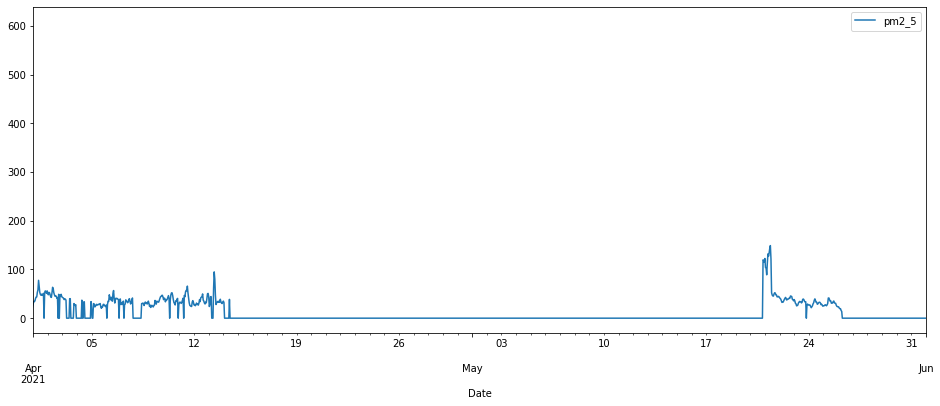

In [25]:
plt.rcParams['figure.figsize']=(16,6)

x = 'pm2_5'
ax = hourly_colaba[[x]].fillna(0).plot()
ax.set_xlim(['2021-04-01', '2021-06-01'])

(449232.0, 450696.0)

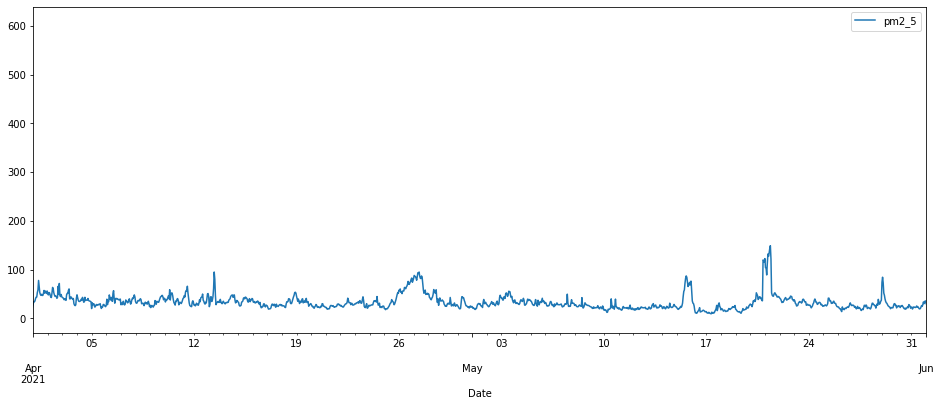

In [26]:
plt.rcParams['figure.figsize']=(16,6)

x = 'pm2_5'
ax = hourly_colaba_copy[[x]].fillna(0).plot()
ax.set_xlim(['2021-04-01', '2021-06-01'])

(449232.0, 450696.0)

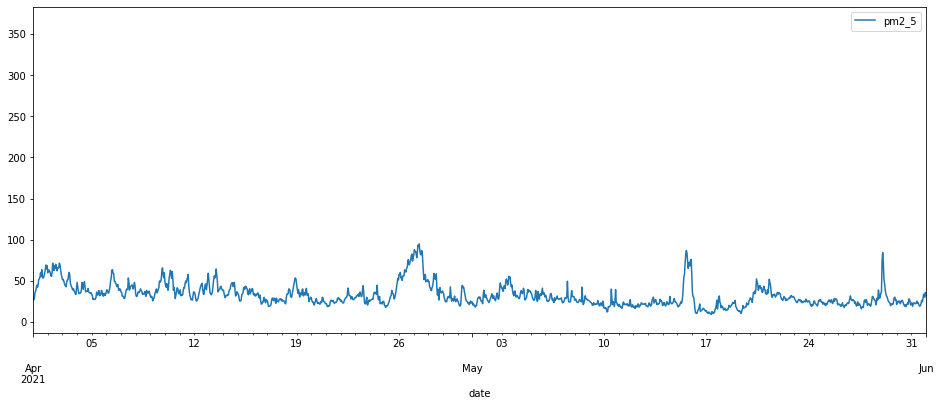

In [27]:
plt.rcParams['figure.figsize']=(16,6)

x = 'pm2_5'
ax = hmean[[x]].fillna(0).plot()
ax.set_xlim(['2021-04-01', '2021-06-01'])

In [ ]:
# Success, looks like nan values are imputed successfully